<a href="https://colab.research.google.com/github/kelvinmaina01/Inua360-The-Kenyan-SME-AI-Agent/blob/ml/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

PROJECT_ROOT = Path.cwd().parent

# Folders inside project root
REPORTS_DIR = PROJECT_ROOT / "reports" / "figures"
DATA_DIR = PROJECT_ROOT / "data" / "external"

# Create them if missing
REPORTS_DIR.mkdir(parents=True, exist_ok=True)
DATA_DIR.mkdir(parents=True, exist_ok=True)

print(" Project root set to:", PROJECT_ROOT)
print(" Reports dir:", REPORTS_DIR)
print(" Data dir:", DATA_DIR)


 Project root set to: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent
 Reports dir: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures
 Data dir: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\data\external


In [3]:
df = pd.read_csv("../data/external/african_sme_dataset.csv")

In [4]:
df.head()

,company_id,country,sector,employees,annual_revenue,tech_adoption_level,main_challenges,digital_tools_used,growth_last_yr,funding_status,female_owned,remote_work_policy
0,440,Rwanda,Education,32,1087,Medium,"Regulation, Awareness","Website, Mobile money, E-commerce",18,Unknown,Yes,Hybrid / Partial
1,47,Rwanda,Education,146,7037,High,"Skills, Awareness","POS, WhatsApp",31,Seed,Yes,No remote policy
2,596,South Africa,Logistics,33,2000,Medium,"Skills, Internet","ERP, WhatsApp",14,Seed,No,Has remote work policy
3,955,Rwanda,Retail,210,11678,Medium,Regulation,"Mobile money, ERP",13,Seed,No,Hybrid / Partial
4,782,Kenya,Finance,183,25186,High,"Internet, Cost","POS, CRM",34,Series A,Yes,Has remote work policy


In [5]:
df.shape

(10000, 12)

In [6]:
df.isnull().sum()

company_id             0
country                0
sector                 0
employees              0
annual_revenue         0
tech_adoption_level    0
main_challenges        0
digital_tools_used     0
growth_last_yr         0
funding_status         0
female_owned           0
remote_work_policy     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   company_id           10000 non-null  int64 
 1   country              10000 non-null  object
 2   sector               10000 non-null  object
 3   employees            10000 non-null  int64 
 4   annual_revenue       10000 non-null  int64 
 5   tech_adoption_level  10000 non-null  object
 6   main_challenges      10000 non-null  object
 7   digital_tools_used   10000 non-null  object
 8   growth_last_yr       10000 non-null  int64 
 9   funding_status       10000 non-null  object
 10  female_owned         10000 non-null  object
 11  remote_work_policy   10000 non-null  object
dtypes: int64(4), object(8)
memory usage: 937.6+ KB


In [8]:
df.describe()

,company_id,employees,annual_revenue,growth_last_yr
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,500.500000,99.107500,5938.202100,16.620000
std,288.689425,105.557833,7201.744448,11.890304
min,1.000000,2.000000,1000.000000,-17.000000
25%,250.750000,35.000000,1824.750000,7.000000
50%,500.500000,66.000000,3600.500000,16.000000
75%,750.250000,123.000000,7182.500000,27.000000
max,1000.000000,1515.000000,128497.000000,54.000000


In [9]:
df['country'].value_counts()


country
Ghana           2218
Nigeria         2194
Kenya           2100
Rwanda          1786
South Africa    1702
Name: count, dtype: int64

In [10]:
df.groupby('country')['annual_revenue'].mean()

country
Ghana           5959.072588
Kenya           5846.273333
Nigeria         5892.623974
Rwanda          5936.820829
South Africa    6084.632785
Name: annual_revenue, dtype: float64

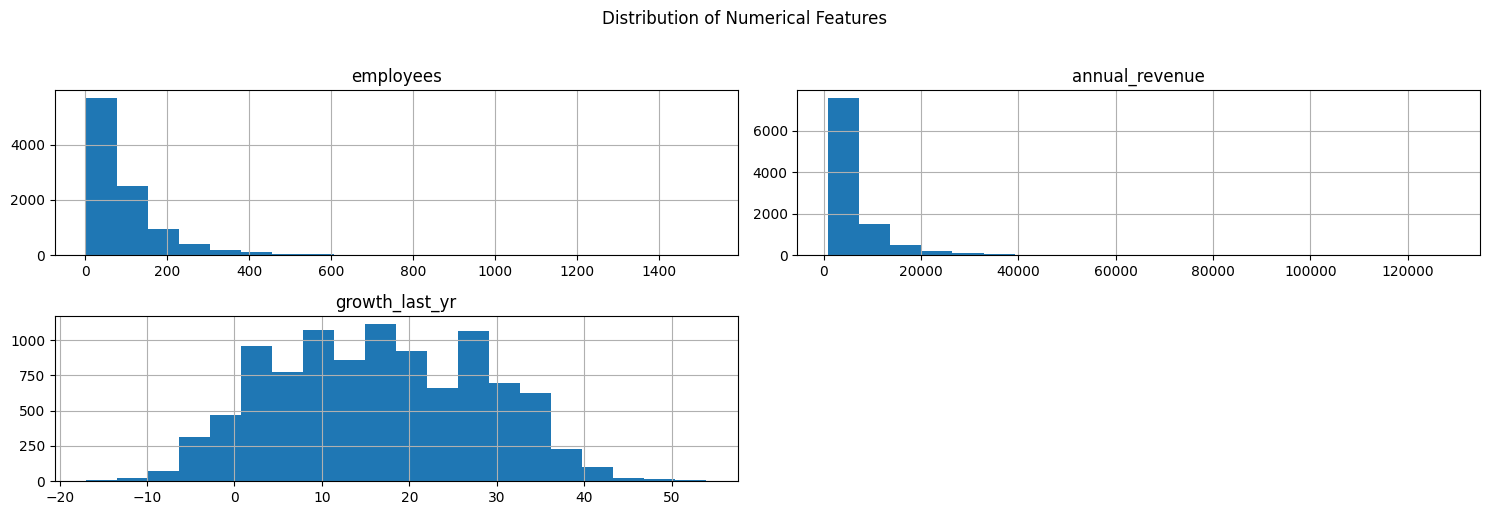

Figure saved at: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\numerical_distribution.png


In [11]:
numerical_cols = ['employees', 'annual_revenue', 'growth_last_yr']

import matplotlib.pyplot as plt

save_path = REPORTS_DIR / "numerical_distribution.png"

df[numerical_cols].hist(bins=20, figsize=(15, 5))
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Figure saved at: {save_path}")


In [12]:
import matplotlib.pyplot as plt

categorical_cols = ['country', 'sector', 'tech_adoption_level']


for col in categorical_cols:
    plt.figure(figsize=(6, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
     
    save_path = REPORTS_DIR / f"{col}_distribution.png"
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close()  
    
    print(f"Saved: {save_path}")


Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\country_distribution.png
Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\sector_distribution.png
Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\tech_adoption_level_distribution.png


In [13]:
df.columns.to_list()

['company_id',
 'country',
 'sector',
 'employees',
 'annual_revenue',
 'tech_adoption_level',
 'main_challenges',
 'digital_tools_used',
 'growth_last_yr',
 'funding_status',
 'female_owned',
 'remote_work_policy']

In [14]:
print(df['funding_status'].value_counts(dropna=False))
print(df['remote_work_policy'].value_counts(dropna=False))

funding_status
Unknown         2500
Seed            2500
Series A        2500
Bootstrapped    2500
Name: count, dtype: int64
remote_work_policy
Has remote work policy    3666
No remote policy          3214
Hybrid / Partial          3120
Name: count, dtype: int64


In [15]:
df['funding_status'] = df['funding_status'].fillna('Unknown')
df['remote_work_policy'] = df['remote_work_policy'].fillna('No Policy')
print(df.isnull().sum())

company_id             0
country                0
sector                 0
employees              0
annual_revenue         0
tech_adoption_level    0
main_challenges        0
digital_tools_used     0
growth_last_yr         0
funding_status         0
female_owned           0
remote_work_policy     0
dtype: int64


In [16]:
df['funding_status'].value_counts()

funding_status
Unknown         2500
Seed            2500
Series A        2500
Bootstrapped    2500
Name: count, dtype: int64

In [17]:
country_revenue_growth = df.groupby('country')[['annual_revenue', 'growth_last_yr']].mean()
print("Mean annual revenue and growth by country:")
display(country_revenue_growth)

sector_revenue_growth = df.groupby('sector')[['annual_revenue', 'growth_last_yr']].mean()
print("\nMean annual revenue and growth by sector:")
display(sector_revenue_growth)

tech_adoption_revenue_growth = df.groupby('tech_adoption_level')[['annual_revenue', 'growth_last_yr']].mean()
print("\nMean annual revenue and growth by tech adoption level:")
display(tech_adoption_revenue_growth)

correlation_matrix = df[['employees', 'annual_revenue', 'growth_last_yr']].corr()
print("\nCorrelation matrix for numerical columns:")
display(correlation_matrix)

Mean annual revenue and growth by country:


,annual_revenue,growth_last_yr
country,,
Ghana,5959.072588,16.229937
Kenya,5846.273333,16.796667
Nigeria,5892.623974,16.688241
Rwanda,5936.820829,16.866741
South Africa,6084.632785,16.563455



Mean annual revenue and growth by sector:


,annual_revenue,growth_last_yr
sector,,
Education,4244.753731,16.296785
Farming,3154.659739,15.932304
Finance,9635.499387,17.927696
Logistics,5901.805369,16.354484
Manufacturing,7711.158798,16.800123
Retail,5203.420455,16.457536



Mean annual revenue and growth by tech adoption level:


,annual_revenue,growth_last_yr
tech_adoption_level,,
High,6345.595149,29.429685
Low,5545.007106,3.711563
Medium,5881.977042,15.342633



Correlation matrix for numerical columns:


,employees,annual_revenue,growth_last_yr
employees,1.000000,0.877520,0.165139
annual_revenue,0.877520,1.000000,0.228765
growth_last_yr,0.165139,0.228765,1.000000


In [18]:
tech_country_analysis = df.groupby(['tech_adoption_level', 'country'])[['annual_revenue', 'growth_last_yr']].mean()
funding_growth = df.groupby('funding_status')['growth_last_yr'].mean().reset_index()
remote_work_growth = df.groupby('remote_work_policy')['growth_last_yr'].mean().reset_index()

print("Analysis by Tech Adoption Level and Country:")
display(tech_country_analysis)

print("\nAnalysis of Growth by Funding Status:")
display(funding_growth)

print("\nAnalysis of Growth by Remote Work Policy:")
display(remote_work_growth)

Analysis by Tech Adoption Level and Country:


annual_revenue  growth_last_yr
tech_adoption_level country                                     
High                Ghana            6679.371120       29.214575
                    Kenya            5836.795918       29.451701
                    Nigeria          6331.172727       29.451948
                    Rwanda           6536.546603       29.635071
                    South Africa     6374.486301       29.422945
Low                 Ghana            5565.939522        3.700422
                    Kenya            5354.299225        3.522481
                    Nigeria          5814.639586        3.785820
                    Rwanda           4984.289773        3.732955
                    South Africa     5959.289720        3.839252
Medium              Ghana            5627.187990       15.298956
                    Kenya            6296.675000       15.769444
                    Nigeria          5511.248996       15.224900
                    Rwanda           6134.116800       15.030400
                    South Africa     5909.305317       15.358491


Analysis of Growth by Funding Status:


,funding_status,growth_last_yr
0,Bootstrapped,3.4396
1,Seed,21.2552
2,Series A,29.7560
3,Unknown,12.0292



Analysis of Growth by Remote Work Policy:


,remote_work_policy,growth_last_yr
0,Has remote work policy,24.906710
1,Hybrid / Partial,15.095833
2,No remote policy,8.647480


In [19]:
# mean annual revenue and growth by country
country_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(12, 6))
plt.title('Mean Annual Revenue and Growth by Country')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_Annual_Revenue_and_Growth_by_Country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close() 
plt.show() 
    
 

In [20]:
# mean annual revenue and growth by sector
sector_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(12, 6))
plt.title('Mean Annual Revenue and Growth by Sector')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_annual_Revenue_and_Growth_by_Sector.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

In [21]:
# mean annual revenue and growth by tech adoption level
tech_adoption_revenue_growth[['annual_revenue', 'growth_last_yr']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Annual Revenue and Growth by Tech Adoption Level')
plt.xlabel('Tech Adoption Level')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
save_path = REPORTS_DIR / f"Mean_Annual_Revenue_and_Growth_by_Tech_Adoption_Level.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

In [22]:
# correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.tight_layout()
save_path = REPORTS_DIR / f"Correlation_Matrix_of_Numerical_Columns.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.close()  
    
plt.show()

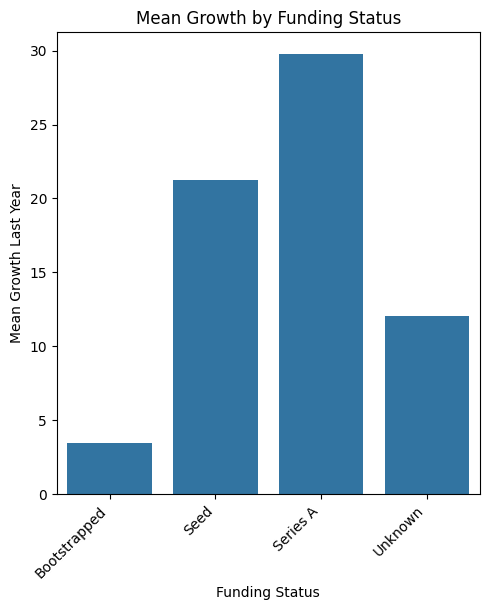

Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\Mean_Growth_by_Funding_Status.png


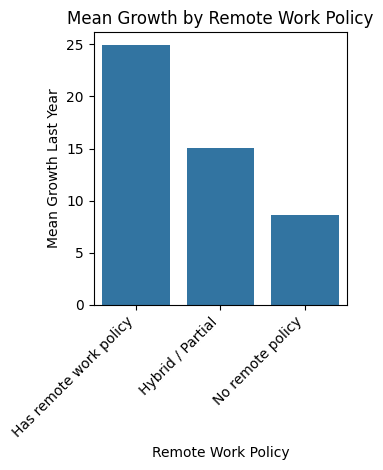

Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_growth_by_funding_and_remote_policy.png


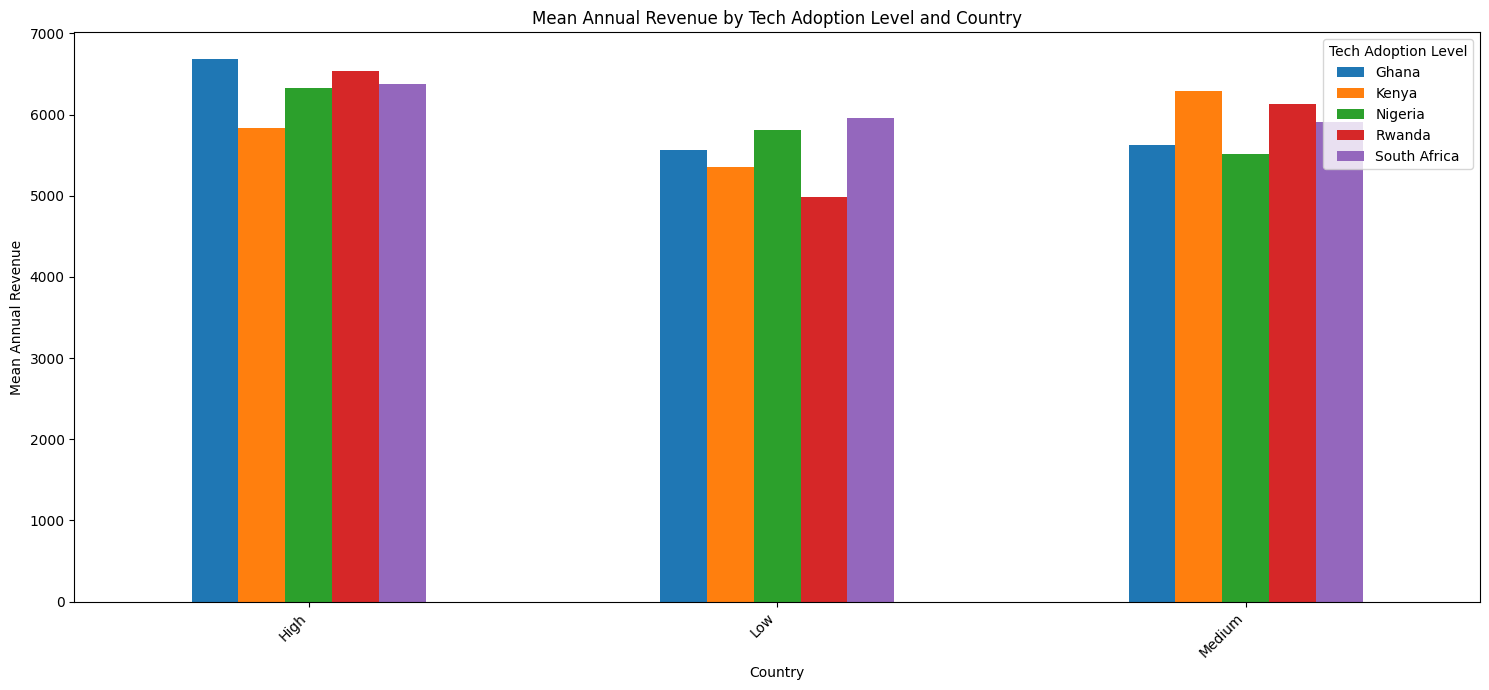

Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_annual_revenue_by_tech_adoption_and_country.png


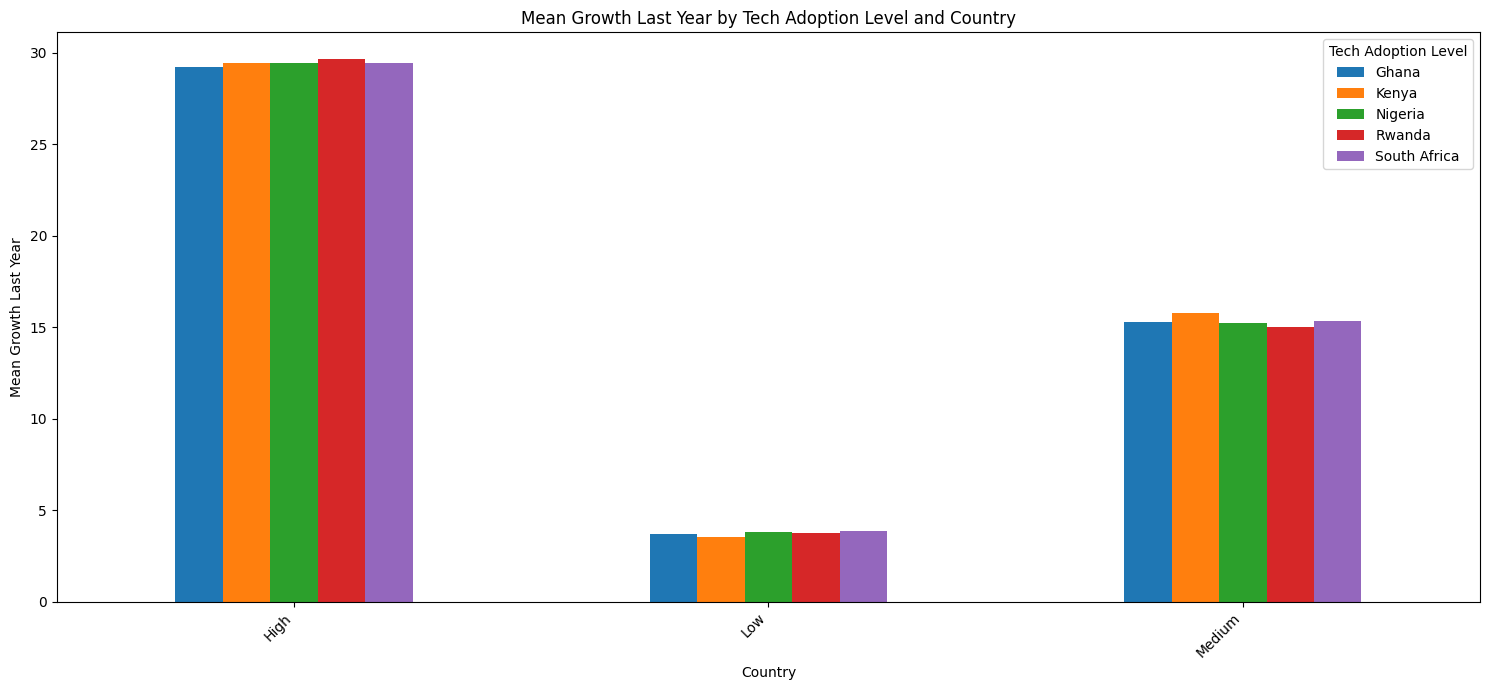

Saved: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\reports\figures\mean_growth_last_year_by_tech_adoption_and_country.png


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

REPORTS_DIR = PROJECT_ROOT / "reports" / "figures"
REPORTS_DIR.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='funding_status', y='growth_last_yr', data=funding_growth)
plt.title('Mean Growth by Funding Status')
plt.xlabel('Funding Status')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')

save_path = REPORTS_DIR / "Mean_Growth_by_Funding_Status.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

plt.subplot(1, 2, 2)
sns.barplot(x='remote_work_policy', y='growth_last_yr', data=remote_work_growth)
plt.title('Mean Growth by Remote Work Policy')
plt.xlabel('Remote Work Policy')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

save_path = REPORTS_DIR / "mean_growth_by_funding_and_remote_policy.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

ax = tech_country_analysis['annual_revenue'].unstack().plot(kind='bar', figsize=(15, 7))
plt.title('Mean Annual Revenue by Tech Adoption Level and Country')
plt.xlabel('Country')
plt.ylabel('Mean Annual Revenue')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tech Adoption Level')
plt.tight_layout()
 
save_path = REPORTS_DIR / "mean_annual_revenue_by_tech_adoption_and_country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")

ax = tech_country_analysis['growth_last_yr'].unstack().plot(kind='bar', figsize=(15, 7))
plt.title('Mean Growth Last Year by Tech Adoption Level and Country')
plt.xlabel('Country')
plt.ylabel('Mean Growth Last Year')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tech Adoption Level')
plt.tight_layout()

 
save_path = REPORTS_DIR / "mean_growth_last_year_by_tech_adoption_and_country.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
print(f"Saved: {save_path}")


In [24]:
df.isnull().sum()

company_id             0
country                0
sector                 0
employees              0
annual_revenue         0
tech_adoption_level    0
main_challenges        0
digital_tools_used     0
growth_last_yr         0
funding_status         0
female_owned           0
remote_work_policy     0
dtype: int64

In [25]:
from pathlib import Path

SAVE_PATH = (PROJECT_ROOT / "data" / "interim")
SAVE_PATH.mkdir(parents=True, exist_ok=True)

file_path = SAVE_PATH / "Clean_data.csv"
df.to_csv(file_path, index=False)

print(f"File saved at: {file_path}")


File saved at: c:\Users\USER\Desktop\Inua360-The-Kenyan-SME-AI-Agent\data\interim\Clean_data.csv


In [26]:
df['funding_status'].value_counts(normalize=True)


funding_status
Unknown         0.25
Seed            0.25
Series A        0.25
Bootstrapped    0.25
Name: proportion, dtype: float64